<a href="https://colab.research.google.com/github/follimatteo/LearningPyTorch/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision.transforms import transforms

import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
torch.cuda.is_available()

True

In [3]:
data_train = torchvision.datasets.MNIST("/data/", train = True, download=True, transform=transforms.ToTensor())
data_test = torchvision.datasets.MNIST("/data/", train = False, download=True, transform=transforms.ToTensor())

classes = data_train.classes
data_train, classes

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


(Dataset MNIST
     Number of datapoints: 60000
     Root location: /data/
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 ['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'])

<class 'tuple'>
<class 'torch.Tensor'>
torch.Size([1, 28, 28])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])




Label:  5


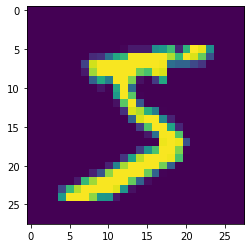

In [4]:
# Dataset exploration 
print(type(data_train[0]))
print(type(data_train[0][0]))
print(data_train[0][0].shape)
print(data_train[0][0][0][0])
print("\n")
print("\n")
print("Label: ", data_train[0][1])
plt.imshow(data_train[0][0].view(28,28));

In [5]:
def tensor2matrix(dset, limit=-1):
  x = dset.data[:limit].clone().detach().float().div_(255)
  x = x.reshape((x.shape[0], -1))
  y = dset.targets[:limit].clone().detach()
  return x, y

x_train, y_train = tensor2matrix(data_train, limit = 10000)
x_valid, y_valid = tensor2matrix(data_test, limit = 1000 )
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

torch.Size([10000, 784])
torch.Size([10000])
torch.Size([1000, 784])
torch.Size([1000])


In [6]:
### Linear classifier
class Lin ():
  def __init__(self, shape, lr, loss):
    self.device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    self.W = torch.rand(shape, requires_grad=True)
    self.b = torch.rand(shape[-1], requires_grad=True)
    
    self.lr = lr
    self.loss = loss
    #print("W: ",self.W.shape)
    #print("b: ",self.b.shape)


  def __call__(self, x):
    return torch.matmul(x, self.W) + self.b

  def train(self, x, y, x_valid, y_valid, epochs, step = 0):

    for e in range(epochs+1):
      
      scores = self.__call__(x)
      l = self.loss(scores, y)
      l.backward()
      
      acc = accuracy(scores, y)
      with torch.no_grad():
        # compute validation loss and metrics
        valid_scores = self.__call__(x_valid)
        valid_loss = F.cross_entropy(valid_scores, y_valid).item()
        valid_acc = accuracy(valid_scores, y_valid).item()

        self.W -= self.lr * self.W.grad
        self.b -= self.lr * self.b.grad

        self.W.grad.zero_()
        self.b.grad.zero_()
      
      if e % 100 == 0:
        print(f"Epoch {e}: train loss {l:.3f} - train acc {acc:.3f} - valid loss {valid_loss:.3f} - valid acc {valid_acc:.3f}")

      


In [7]:
def accuracy(scores, y):
  y_hat = torch.argmax(scores, -1)
  correct = (y_hat==y).sum()
  return correct.true_divide(y.shape[0])

In [8]:
### random classifier
lin = Lin((28*28,10), 0, None)
out = lin(x_train)
acc = accuracy(out, y_train)
print(acc)

tensor(0.0666)


In [9]:
### TRAIN 
lin = Lin((28*28,10), 0.1, F.cross_entropy)
lin.train(x_train, y_train, x_valid, y_valid, 2000, 0)

Epoch 0: train loss 5.085 - train acc 0.120 - valid loss 4.989 - valid acc 0.117
Epoch 100: train loss 0.821 - train acc 0.741 - valid loss 0.892 - valid acc 0.704
Epoch 200: train loss 0.607 - train acc 0.814 - valid loss 0.685 - valid acc 0.768
Epoch 300: train loss 0.521 - train acc 0.845 - valid loss 0.601 - valid acc 0.811
Epoch 400: train loss 0.472 - train acc 0.861 - valid loss 0.553 - valid acc 0.832
Epoch 500: train loss 0.440 - train acc 0.872 - valid loss 0.522 - valid acc 0.835
Epoch 600: train loss 0.416 - train acc 0.879 - valid loss 0.500 - valid acc 0.842
Epoch 700: train loss 0.398 - train acc 0.885 - valid loss 0.483 - valid acc 0.848
Epoch 800: train loss 0.384 - train acc 0.889 - valid loss 0.469 - valid acc 0.852
Epoch 900: train loss 0.372 - train acc 0.893 - valid loss 0.458 - valid acc 0.855
Epoch 1000: train loss 0.362 - train acc 0.897 - valid loss 0.449 - valid acc 0.858
Epoch 1100: train loss 0.353 - train acc 0.899 - valid loss 0.441 - valid acc 0.860
Epoc

In [10]:
### Linear classifier, ADDING OPTIMIZERS
class Lin ():
  def __init__(self, shape, lr, loss, opti='default'):
    self.device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    self.W = torch.rand(shape, requires_grad=True)
    self.b = torch.rand(shape[-1], requires_grad=True)
    
    self.loss = loss
    self.opti = torch.optim.Adam([self.W, self.b]) if opti == 'default' else opti([self.W,self.b])
    #print("W: ",self.W.shape)
    #print("b: ",self.b.shape)


  def __call__(self, x):
    return torch.matmul(x, self.W) + self.b

  def train(self, x, y, x_valid, y_valid, epochs, step = 0):
    losses = []
    accuracies = []

    for e in range(epochs+1):
      
      scores = self.__call__(x)
      l = self.loss(scores, y)
      l.backward()
      self.opti.step()

      acc = accuracy(scores, y)
      losses.append(l)
      accuracies.append(acc)
      with torch.no_grad():
        # compute validation loss and metrics
        valid_scores = self.__call__(x_valid)
        valid_loss = F.cross_entropy(valid_scores, y_valid).item()
        valid_acc = accuracy(valid_scores, y_valid).item()

      if e % 100 == 0:
        print(f"Epoch {e}: train loss {l:.3f} - train acc {acc:.3f} - valid loss {valid_loss:.3f} - valid acc {valid_acc:.3f}")
      
    plt.plot(losses)
    plt.plot(accuracies)
    plt.show()

Epoch 0: train loss 4.697 - train acc 0.074 - valid loss 4.415 - valid acc 0.072
Epoch 100: train loss 1.222 - train acc 0.647 - valid loss 1.272 - valid acc 0.606
Epoch 200: train loss 1.022 - train acc 0.750 - valid loss 1.212 - valid acc 0.701


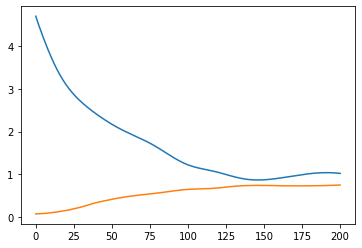

In [11]:
### TRAIN 
lin = Lin((28*28,10), 0.1, F.cross_entropy)
lin.train(x_train, y_train, x_valid, y_valid, 200, 0)

## NN Module

In [76]:
import torch as T
import torchvision
from torchvision.transforms import transforms

import matplotlib.pyplot as plt
import torch.nn.functional as F

from functools import partial
from timeit import default_timer as timer

In [14]:
data_train = torchvision.datasets.MNIST("/data/", train = True, download=True, transform=transforms.ToTensor())
data_test = torchvision.datasets.MNIST("/data/", train = False, download=True, transform=transforms.ToTensor())

classes = data_train.classes
data_train, classes

(Dataset MNIST
     Number of datapoints: 60000
     Root location: /data/
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 ['0 - zero',
  '1 - one',
  '2 - two',
  '3 - three',
  '4 - four',
  '5 - five',
  '6 - six',
  '7 - seven',
  '8 - eight',
  '9 - nine'])

In [15]:
## DATA LOADER
train_dataloader = T.utils.data.DataLoader(data_train, batch_size=32)
test_dataloader = T.utils.data.DataLoader(data_test, batch_size=32)

for x, y in test_dataloader:
  print(x.shape)
  print(y.shape)
  break

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [72]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))


class NN (T.nn.Module):
  def __init__(self, hidden_layers, in_size, hidden_size, out):
    super(NN, self).__init__()
    self.ln0 = T.nn.Linear(in_size, hidden_size)
    self.hidden_ln = T.nn.ModuleList(
        [T.nn.Linear(hidden_size, hidden_size) for i in range(hidden_layers)])
    self.ln = T.nn.Linear(hidden_size, out)

  def forward(self, x):
    x = T.nn.Flatten()(x)
    x = self.ln0(x)
    x = T.nn.ReLU()(x)
    for l in self.hidden_ln:
      x = l(x)
      x = T.nn.ReLU()(x)
    x = self.ln(x)
    return x

model_cpu = NN(1 ,28*28, 512, 10).to('cpu')
print("cpu model created")

if device == "cuda":
  model_gpu = NN(1 ,28*28, 512, 10).to(device)
  print("gpu model created")

Using cuda device
cpu model created
gpu model created


In [63]:
## loss and opt 

loss_fn = T.nn.CrossEntropyLoss()
optimizer = partial(T.optim.SGD, lr=1e-3)

In [67]:
def train(dataloader, model, loss_fn, optimizer):
    
    optimizer = optimizer(model.parameters())
    size = len(dataloader.dataset)
    model.train()
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [68]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [79]:
## train test on gpu 
device = "gpu"
epochs = 5
start = timer()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model_gpu, loss_fn, optimizer)
    test(test_dataloader, model_gpu, loss_fn)
end = timer()

print("Done! elapsed time {0}".format(end-start))

Epoch 1
-------------------------------
loss: 0.589584  [    0/60000]
loss: 0.484957  [ 3200/60000]
loss: 0.465791  [ 6400/60000]
loss: 0.396865  [ 9600/60000]
loss: 0.396212  [12800/60000]
loss: 0.589071  [16000/60000]
loss: 0.317289  [19200/60000]
loss: 0.312357  [22400/60000]
loss: 0.317007  [25600/60000]
loss: 0.259020  [28800/60000]
loss: 0.399202  [32000/60000]
loss: 0.338967  [35200/60000]
loss: 0.361333  [38400/60000]
loss: 0.452845  [41600/60000]
loss: 0.414391  [44800/60000]
loss: 0.263846  [48000/60000]
loss: 0.388451  [51200/60000]
loss: 0.266070  [54400/60000]
loss: 0.370493  [57600/60000]
Test Error: 
 Accuracy: 89.1%, Avg loss: 0.396733 

Done! elapsed time 6.998031557000104


In [82]:
## train test on cpu 
device = "cpu"
epochs = 5
start = timer()
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model_cpu, loss_fn, optimizer)
    test(test_dataloader, model_cpu, loss_fn)
end = timer()

print("Done! elapsed time {0}".format(end-start))

Epoch 1
-------------------------------
loss: 2.294869  [    0/60000]
loss: 2.306541  [ 3200/60000]
loss: 2.293825  [ 6400/60000]
loss: 2.285045  [ 9600/60000]
loss: 2.300608  [12800/60000]
loss: 2.290275  [16000/60000]
loss: 2.261045  [19200/60000]
loss: 2.265376  [22400/60000]
loss: 2.257696  [25600/60000]
loss: 2.226776  [28800/60000]
loss: 2.251732  [32000/60000]
loss: 2.265174  [35200/60000]
loss: 2.233833  [38400/60000]
loss: 2.228143  [41600/60000]
loss: 2.249418  [44800/60000]
loss: 2.213856  [48000/60000]
loss: 2.196316  [51200/60000]
loss: 2.201349  [54400/60000]
loss: 2.207278  [57600/60000]
Test Error: 
 Accuracy: 61.1%, Avg loss: 2.190854 

Epoch 2
-------------------------------
loss: 2.195890  [    0/60000]
loss: 2.211551  [ 3200/60000]
loss: 2.172985  [ 6400/60000]
loss: 2.181741  [ 9600/60000]
loss: 2.210437  [12800/60000]
loss: 2.191419  [16000/60000]
loss: 2.084064  [19200/60000]
loss: 2.111748  [22400/60000]
loss: 2.085056  [25600/60000]
loss: 1.994183  [28800/60000